### BUSINESS UNDERSTANDING
---
#### Digitalization - important field of work and industry of future potential <br>

The Covid-19 pandemic of 2020 shows that digitalization and intelligent digital solutions are an important part to overcome the pandemic but also to maintain social or the working life. <br> **Smart programmers** developed several **contact tracing apps** or web platforms to facilitate the search of infections, others **created social networks for neighbourhods** to connect helper and people in need of help and another developers **built video platforms** used for home schooling to teach the children staying at home, celebrate a birthday party with friends or to watch the local ballett performance.

**There exists nearly no area of the people's world whithout any digital support or solution.** This implies that this area is not only an important work field but also one with great future potential. 

Should parents then support or stimulate their children and introduce them early to programming methods? Should boys and girls start coding at school to become a developer later?

### DATA UNDERSTANDING
---
To answer these questions it is useful to look at current developers and programmers around the world. Therefore the **survey done 2020 by Stack Overflow** can be a appropriate **data basis**. Stack Overflow is a global platform where developers - professionals and enthusiats - share their knowledge based on questions and answers to solve common or tricky coding problems.

Each year they do a **survey** beneath their users to **examine aspects like developer experience, career satisfaction, education level and used software or programming language.** In 2020 nearly 65,000 users participated from around 180 countries around the world.

Within this analysis the focus will be to **answer** the following **questions**: 
- When do people of the survey started coding? Do people with IT-related jobs start coding very early?
- Is there any difference between the gender - do men started earlier than women?
- Do people who programm as a hobby / are passionate about programming has also started earlier?
- Is there any difference with regard to the job satisfaction when people start early or later with programming?
- Is there any differences in the age distribution with regard to the education level and the primary field of study? Do people, who start early programming have a better eduction and work / study in IT relevant courses of study?


In [1]:
#Import of all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

First step of the analysis is to read in the csv-file of the Stack Overflow Survey of 2020 to get an overview of the available data, the datatypes and possible values. 

In [2]:
#load of csv-file with data to Stackoverflow-Survey
df_2020 = pd.read_csv('survey_results_public_2020.csv')

In [3]:
#get overview of the data 
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
#get overview of the datatypes and attributes of the survey
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

Based on the first look on the data and in connection with the open questions the following attributes / variables are helpful to get a closer look and use for the analysis: 
- Age1stCode: age of first written code or program
- Gender: demographic information about gender
- Hobbyist: do coding as a hobby
- JobSat: level of current job satisfaction
- EdLevel: Highest level of formal education completed
- UndergradMajor: primary field of study

### DATA PREPARATION
---

**Question 1:**<br>
**When do people of the survey started coding? Do people with IT-related jobs start coding very early?**

**Approach:**<br>
Use the attribute "Age1stCode" and plot a histogram to see the distribution of the age of first coding. Data wrangling to change the datatype from string to numeric.

In [5]:
#copy data for wrangling process or data adjustments 
df_1age = df_2020.copy()

In [6]:
#create dataframe with number of values for each category of "Age1stCode"
age_val = pd.DataFrame(df_1age.Age1stCode.value_counts())

In [7]:
#overview of possible values for Age1stCode
age_val.index

Index(['15', '14', '16', '18', '12', '13', '17', '10', '19', '20', '11', '8',
       '9', '21', '22', '7', '23', '25', '24', '6', 'Younger than 5 years',
       '5', '26', '27', '28', '30', '29', '32', '31', '35', '33', '34', '40',
       '37', '38', '36', '39', '45', '50', '42', 'Older than 85', '44', '43',
       '41', '49', '47', '54', '46', '48', '55', '51', '53', '85', '58', '52',
       '64', '56', '73', '83', '72', '68', '76', '63'],
      dtype='object')

The attribute Age1stCode is defined as a string value. Having a look at the unique possible values most of them are actually numeric. Only the outlying values are described as strings. <br>

On a first attempt to plot the Age-Distribution the age is used for the x-axis and the number of users for each age will be plotted on the y-axis using a normal line plot. 

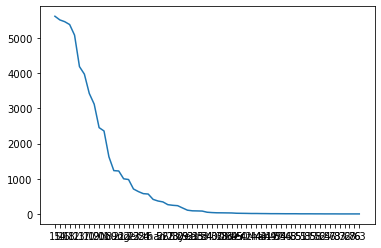

In [8]:
#plot the distribution for each value of Age1stCode
plt.plot(age_val.index,age_val.Age1stCode);

This plot does not answer the question and does not show the distribution properly. Therefore some data changes are needed to plot a correct historgram. 

As main of the data already is numeric the focus on the changes should be on the categorical values 'younger than 5 years'and 'Older than 85'. These values have to be changed to numeric values. 

To evaluate the risk of a bias in the results when changing the data we have to look at the numbers of records with the respective values: 

In [9]:
#check how many values exist for < 5 years 
np.sum(df_1age.Age1stCode == 'Younger than 5 years')

414

In [10]:
#check how many values exist for > 85 years
np.sum(df_1age.Age1stCode == 'Older than 85')

13

In sum there are around 430 records using the categorical value. Considering the allover data records of 65000 the change will not have an impact on the results. 

In this case the records with the value 'younger than 5 years' will be changed to the numeric 4 and the value 'older than 85' will be changed to the numeric 86. 

In [11]:
#to change the column to numeric values, replace the string values with numbers (5 and 86) --> possiblity to plot a histogram
df_1age.replace('Younger than 5 years', 4, inplace = True)
df_1age.replace('Older than 85', 86, inplace = True)

After changing the values the datatype of the attribute is changed from string-object to numeric. 

In [12]:
#change datatype to numeric for Age1stCode - column
df_1age['Age1stCode'] = pd.to_numeric(df_1age.Age1stCode)

Now that the age is a numeric value a normal histogram can be plotted to show the age of first programming distribution. 

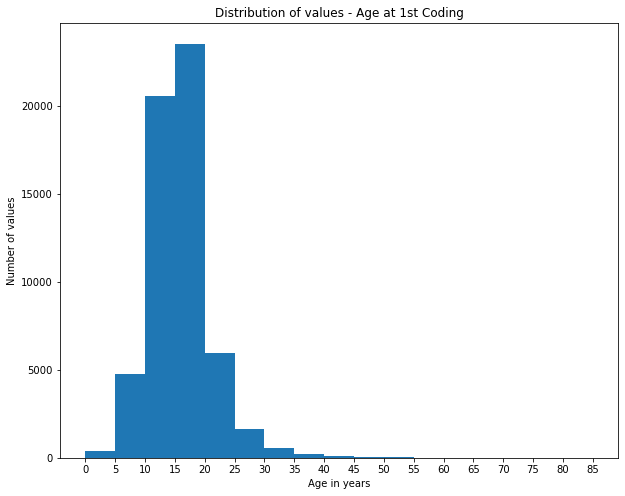

In [13]:
#plot histogram to get an overview of the distribution of the age of first coding
fig = plt.figure(figsize = (10,8))
#define bin_edges in 5 years steps
bin_edges = np.arange(0, df_1age.Age1stCode.max()+1,5)
#plot histogram
plt.hist(df_1age.Age1stCode, bins = bin_edges)
#set x-ticks from 0 to 85
plt.xticks(np.arange(0,90,5))
#description of plot 
plt.xlabel('Age in years')
plt.ylabel('Number of values')
plt.title('Distribution of values - Age at 1st Coding')
plt.show();

Based on the histogram we see that most users start between 10 and 20 and it would be interesting to know the relation on the overall data. 

In [14]:
#relation of people started coding between 10 and 15 years to the whole dataset 
df_1age[(df_1age['Age1stCode']>10) | (df_1age['Age1stCode']< 20)].Age1stCode.count()/df_1age.shape[0]

0.8982175268767162

### EVALUATION
---

**Observations / Results:**<br>
Most of the people start coding at the age between 10 and 20 years - nearly 90%. A little more started between 15 and 20 years. 

### DATA PREPARATION
---

**Question 2:**<br>
**Is there any difference between the gender - do men started earlier than women?**

**Approach:**<br>
Divide the dataset in groups - man, woman and divers and plot a histogram for each to see the differences within the distribution. 

To separate the groups correctly it is necessary to get an overview of the possible values for gender. 

In [15]:
#overview of the distribution gender
df_1age.Gender.value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

Man and woman can be separated easily. The non-binary genders (with more than one values) will be united within the gender-group divers.  

In [16]:
#divide the dataset into gender-datasets for man, woman and divers (non-binary)
df_1age_man = df_1age[df_1age.Gender == 'Man']
df_1age_woman = df_1age[df_1age.Gender == 'Woman']
df_1age_divers = df_1age[(df_1age['Gender']!= 'Man') & (df_1age['Gender'] != 'Woman') & (df_1age['Gender'].notnull())]

As the histogramm plot for the Age1stCode-attribute will be used several times within this analysis there will be a function  defined which can be reused in further steps. 

In [17]:
#function to plot histograms with transparent bars and a range of (0,50) and defined bin edges for Age 1st Code
def plot_hist(dataset, label):
    '''
    Plots a histogram with certain predefined properties. 
            Parameters:
                    dataset (dataframe): data to visualize by the histogram
                    label (str): label used for the data within the legend
            Returns:
                    empty: no return value
            Plot Properties:
                    bin_edges: bins are calculated on 'Age1stCode column and start from 0 to maximum value within 5 value steps
                    alpha: transparancy is set to 0.5 value
                    x-ticks: show x-ticks in a range from 0 to 90 within 5 value steps
                    xlim: x-values are displayed from 0 to 50
        
    '''
    bin_edges = np.arange(0, df_1age['Age1stCode'].max()+1,5)
    plt.hist(dataset, bins = bin_edges, alpha = .5, label = label)
    plt.xticks(np.arange(0,90,5))
    plt.xlim(0,50)

Using the plot-function defined above and the divided gender groups it is possible to plot the gender distribution with regard to the age of first coding. 

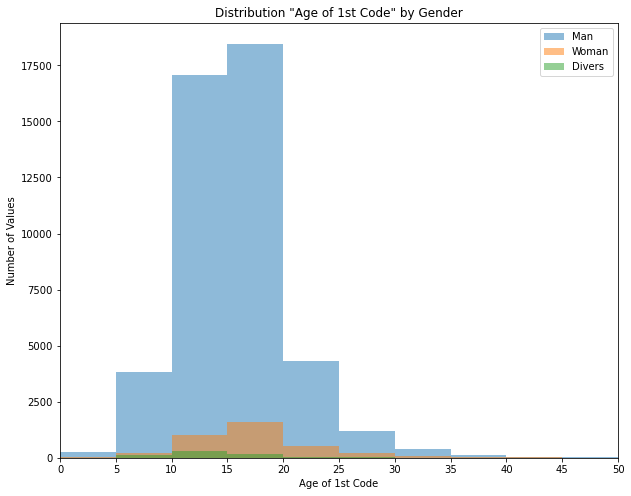

In [18]:
#plot a histogram to show the distribution of Age of 1st coding separated by gender
fig = plt.figure(figsize = (10,8))

#plot one histogram for each dataset - transparent color 
plot_hist(df_1age_man.Age1stCode, 'Man')
plot_hist(df_1age_woman.Age1stCode, 'Woman')
plot_hist(df_1age_divers.Age1stCode, 'Divers')

#description of plot and setting of limits / xticks
plt.ylabel('Number of Values')
plt.xlabel('Age of 1st Code')
plt.title('Distribution "Age of 1st Code" by Gender')
plt.legend()
plt.show();

### EVALUATION
---

**Observations / Results:**<br>
With regard to the starting age the distribution by gender is similar to the overall distribution. All gender groups start mainly between 10 and 20 years. A little more people of the divers-group start earlier by 10 to 15 years. 
Besides that the diagram shows that the main people of the survey are men. In relation to that there are very little amount of women but men do not start earlier than women in coding. 

### DATA PREPARATION
---

**Question 3**<br>
**Do people who programm as a hobby / are passionate about programming has also started earlier?** 

**Approach:**<br>
Divide the dataset in two groups - Hobbyists and Professionals and plot a histogram for each to see the differences within the distribution. 

To compare the 1st Coding age between hobbyists and professionals the attribute Hobbyist will be used for to divide the dataset in two groups - Hobbyist and Professionals. 

In [19]:
#get an overview of the data regarding programming as a hobby 
df_1age.Hobbyist.value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [20]:
#divide the dataset into Hobbyists and Professionals
df_1age_y_h = df_1age[df_1age.Hobbyist == 'Yes']
df_1age_n_h = df_1age[df_1age.Hobbyist == 'No']

Using the plot-function defined above and the datasets for Hobbyists and Professionals it is possible to plot the  distribution with regard to the age of first coding. 

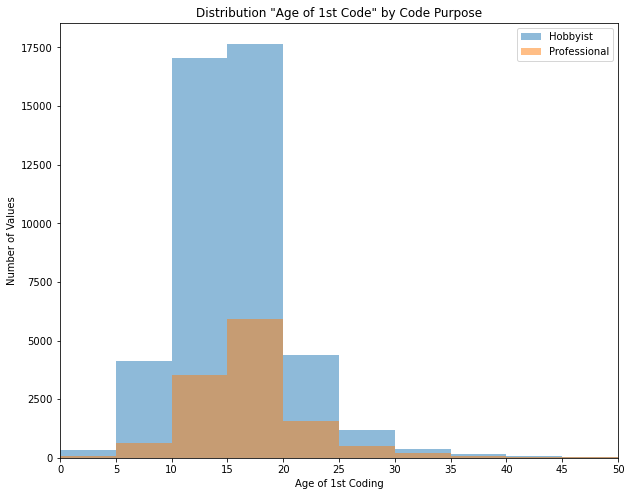

In [21]:
#plot a histogram to show the distribution of Age of 1st coding divided by hobbyists and professionals 
fig = plt.figure(figsize = (10,8))

#plot one histogram for each dataset, transparent color
plot_hist(df_1age_y_h.Age1stCode, 'Hobbyist')
plot_hist(df_1age_n_h.Age1stCode, 'Professional')

#plot description, legend and axes limits 
plt.xlabel('Age of 1st Coding')
plt.ylabel('Number of Values')
plt.title('Distribution "Age of 1st Code" by Code Purpose')
plt.legend()
plt.show();

### EVALUATION
---

**Observations / Results:**<br>
Within the group of hobbyist the start age of coding are similar distributed between 10 and 20 years. In the professional group there are slightly more who started coding between 15 and 20 than between 10 and 15. Besides that hobbyist are the main people on stackoverflow.

### DATA PREPARATION
---

**Question 4:**<br>
**Is there any difference with regard to the job satisfaction when people start early or later with programming?**

**Approach:**<br>
Divide the dataset in groups with regard to the respective job satisfaction values and plot a histogram for each to see the differences within the distribution. 

With regard to the job satisfaction there are more than three unique values. It is laborious to divide the dataset in a separate dataset for each value.

Therefore the possible values are stored in a list / series-object to iterate through when plotting the histograms. 

In [22]:
#overview of the data regarding job satisfaction 
df_1age.JobSat.value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [23]:
#get possible values for job satisfaction and store it in a variable
job_sat_1age = pd.Series(df_1age.JobSat.value_counts().index)

In [24]:
#print values for job satisfaction
job_sat_1age

0                        Very satisfied
1                    Slightly satisfied
2                 Slightly dissatisfied
3    Neither satisfied nor dissatisfied
4                     Very dissatisfied
dtype: object

Using the plot-function and the object with the job-satisfaction-values it is possible to show the distribution of the age based on the job satisfaction. 

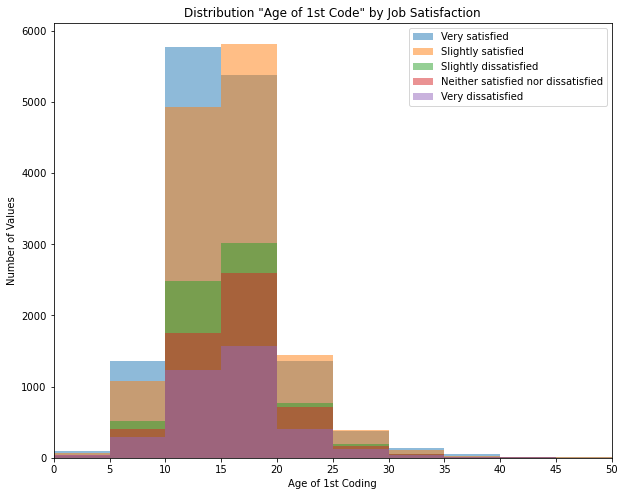

In [25]:
#create a plot to show the distribution of Age 1st Coding divided by job satisfaction
fig = plt.figure(figsize = (10,8))

#for loop to print overlapping histograms for each job-satisfaction-category, incl. transparent colors
for i in job_sat_1age:
    plot_hist(df_1age[df_1age['JobSat'] == i].Age1stCode, i)
    
#description of plot and setting of limits / xticks, legend placement
plt.xlabel('Age of 1st Coding')
plt.ylabel('Number of Values')
plt.legend(bbox_to_anchor = (1,1))
plt.title('Distribution "Age of 1st Code" by Job Satisfaction');


### EVALUATION
---

**Observations / Results:**<br>
Most of the people are satisfied or very satisfied with their jobs. There is one exception regarding the distribution of the age of first coding - there are more very satisfied people starting coding from 10 to 15 years than from 15 to 20 years. The other job-satisfaction-groups have a similar distribution as the general distribution of first coding age.

### DATA PREPARATION
---

**Question 5:**<br>
**Is there any differences in the age distribution with regard to the education level and the primary field of study? Do people, who start early programming have a better eduction and work / study in IT relevant courses of study?**

**Approach:**<br>
For education level and primary field of study created a Facet Grid to display one histogram for each unique value. Null values are replaced with "No Input".

With regard to the education level there are also many unique values. Plotting these values in one histogram will be very confusing and it will be dificult to see the results. Therefore here a FacetGrid will be used to plot one histogram for each education level. 

Null-values cannot be plotted in a FacetGrid. In this case the null-values are filled with 'No Input' to not loose the information. As the column name will be used for the title of each histogram, very long titles can disturb and stretch the plot unnecessary. 

In [26]:
#fill Null-Values with 'No Input'-Value
df_1age.EdLevel.fillna('No Input', inplace = True)

In [27]:
# get all possible values for Education Levenl 
cat_edLevel = pd.Series(df_1age.EdLevel.value_counts().index)
cat_edLevel

0         Bachelor’s degree (B.A., B.S., B.Eng., etc.)
1      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
2    Some college/university study without earning ...
3                                             No Input
4    Secondary school (e.g. American high school, G...
5                  Associate degree (A.A., A.S., etc.)
6           Other doctoral degree (Ph.D., Ed.D., etc.)
7                            Primary/elementary school
8                   Professional degree (JD, MD, etc.)
9               I never completed any formal education
dtype: object

The respective values for education level will be replaced with shorter names which then will be shown as a title over the histogram. 

In [28]:
#Change values to shorten the titles used in below Facet Grid
df_1age["EdLevel"] = df_1age["EdLevel"].map({"Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
                                   "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
                                   "Some college/university study without earning a degree": 'Study without degree',
                                   "No Input": "No Input",
                                   "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
                                   "Associate degree (A.A., A.S., etc.)": "Associate degree",
                                   "Other doctoral degree (Ph.D., Ed.D., etc.)": "Doctoral Degree", 
                                   "Primary/elementary school": "Primary/elementary school",
                                   "Professional degree (JD, MD, etc.)": "Professional Degree", 
                                   "I never completed any formal education": "No formal education"})

As the FacetGrid with some specific properties will be reused in a further part of the analysis there is a function to plot the FacetGrid and Histogram combination defined. 

In [29]:
#defition to plot a Facet grid for a categorical and numerical variable with 3 columns, no shared y-axis, pre-defined bins
def plot_facetgrid(dataset,  cat_variable, num_variable):
    '''
    Plots a Facet Grid with one histogram for each categorical variable showing the distribution of the numeric value. 
    FacetGrid and histogram have some predefined properties.
            Parameters:
                    dataset (dataframe): data to visualize by the histogram
                    cat_variable (str): column name the bin edges will be calculated on 
                    num_variable (str): label used for the data within the legend
            Returns:
                    g (FacetGrid): returns FacetGrid-Object
            Plot Properties:
                    bin_edges: bins are calculated on 'Age1stCode column and start from 0 to maximum value within 5 value steps
                    col_wrap: columns of FacetGrid are set to 3
                    height: height of grids is set to 4
                    sharey: no sharing of y-axis
                    alpha: transparancy is set to 0.5 value
                    x-ticks: show x-ticks in a range from 0 to 90 within 5 value steps
                    xlim: x-values are displayed from 0 to 50
                    set_titles: column names are used for each grid title
        
    '''
    bin_edges = np.arange(0, dataset['Age1stCode'].max()+1,5)
    g = sb.FacetGrid(data = dataset, col = cat_variable, col_wrap = 3, height = 4, sharey=False)
    g.map(plt.hist, num_variable, bins = bin_edges)
    g.set_titles('{col_name}')
    plt.xticks(np.arange(0,90,5))
    plt.xlim(0,50)    
    plt.subplots_adjust(top=0.95)
    return g 

Using the defined function above and the changed values for the education level the Facet Grid with the histograms can be plotted to show the distribution of the 1st coding Age based on the education level. 

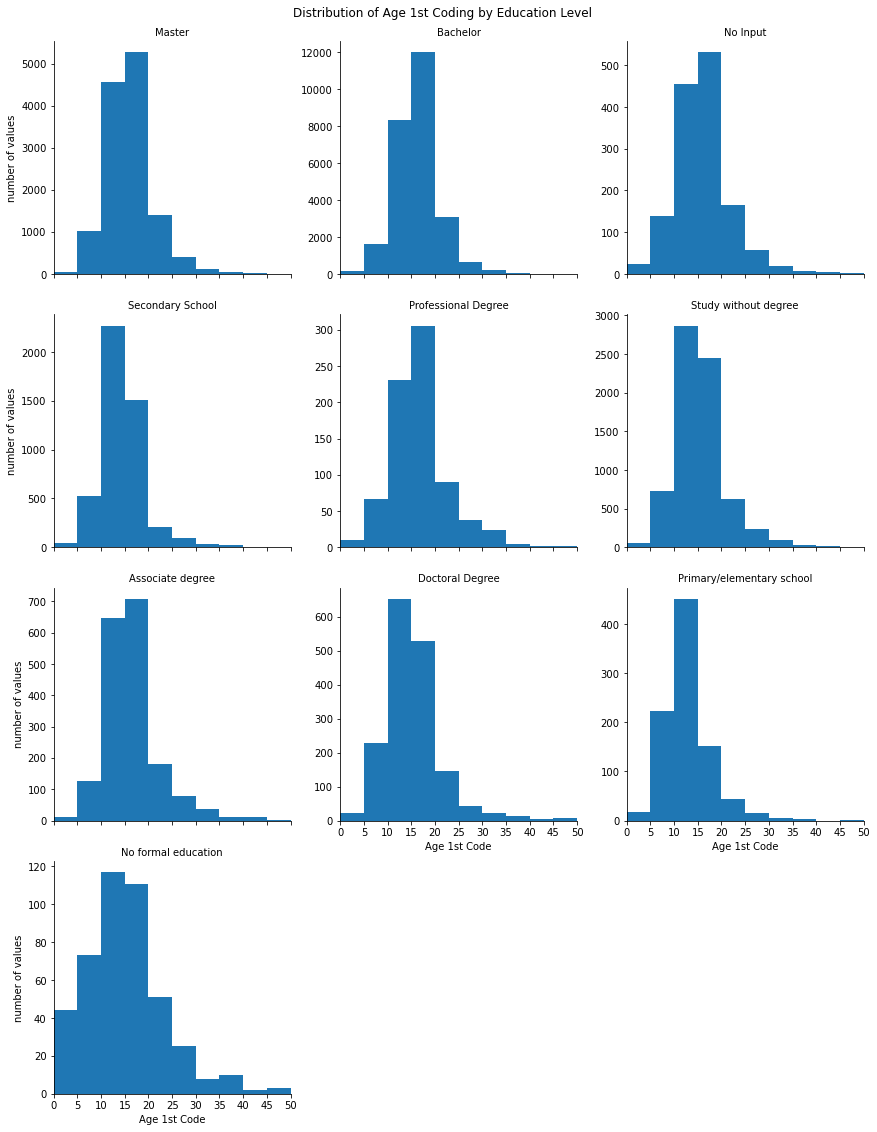

In [30]:
#create Facet Grid to show the distribution of Age 1st Coding with regard to the education level 
#overlapping histograms were very unclear

#instantiate FacetGrid for Education Level, 3 columns and no sharing of y-axes
x = plot_facetgrid(df_1age, 'EdLevel', 'Age1stCode')

#plot description, titles, axes labels and xticks / labels
x.set_axis_labels("Age 1st Code", "number of values")
x.fig.suptitle('Distribution of Age 1st Coding by Education Level') 
plt.show(); 

Similar to education level there are also many unique values for the primary field of study. Plotting these values in one histogram will be very confusing and so the FacetGrid of above will be used here aswell.  

Null-values cannot be plotted in a FacetGrid. In this case the null-values are filled with 'No Input' to not loose the information. As the column name will be used for the title of each histogram, very long titles can disturb and stretch the plot unnecessary. 

In [31]:
#fill Null-Values with 'No Input'-Value
df_1age.UndergradMajor.fillna('No Input', inplace = True)

In [32]:
#overview of primary field of study 
df_1age.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
No Input                                                                          13466
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major        

The respective values for primary field studies will be replaced with shorter names to shorten the title of each histogram in the FacetGrid.

In [33]:
#Change values to shorten the titles used in below Facet Grid
df_1age["UndergradMajor"] = df_1age["UndergradMajor"].map({"Computer science, computer engineering, or software engineering": "Computer science / (SW ) engineering",
                                   "Another engineering discipline (such as civil, electrical, mechanical, etc.)": "Engineering Discipline",
                                   "Information systems, information technology, or system administration": "Information systems / technology, System Admin.",
                                   "A natural science (such as biology, chemistry, physics, etc.)": "Natural Science (Bio,Chem,Phy)",
                                   "Mathematics or statistics": "Mathematics or statistics",
                                   "Web development or web design": "Web development or web design",
                                   "A business discipline (such as accounting, finance, marketing, etc.)": "Business Discipline", 
                                   "A humanities discipline (such as literature, history, philosophy, etc.)": "Humanities Discipline", 
                                   "A social science (such as anthropology, psychology, political science, etc.)": "Social Science",
                                   "Fine arts or performing arts (such as graphic design, music, studio art, etc.)": "Fine / Performing Arts",
                                   "I never declared a major": "I never declared a major",
                                   "A health science (such as nursing, pharmacy, radiology, etc.)": "Health Science",
                                   "No Input": "No Input"})

Using the defined function above to plot the FacetGrid based on the 1st coding age and the primary field of study. 

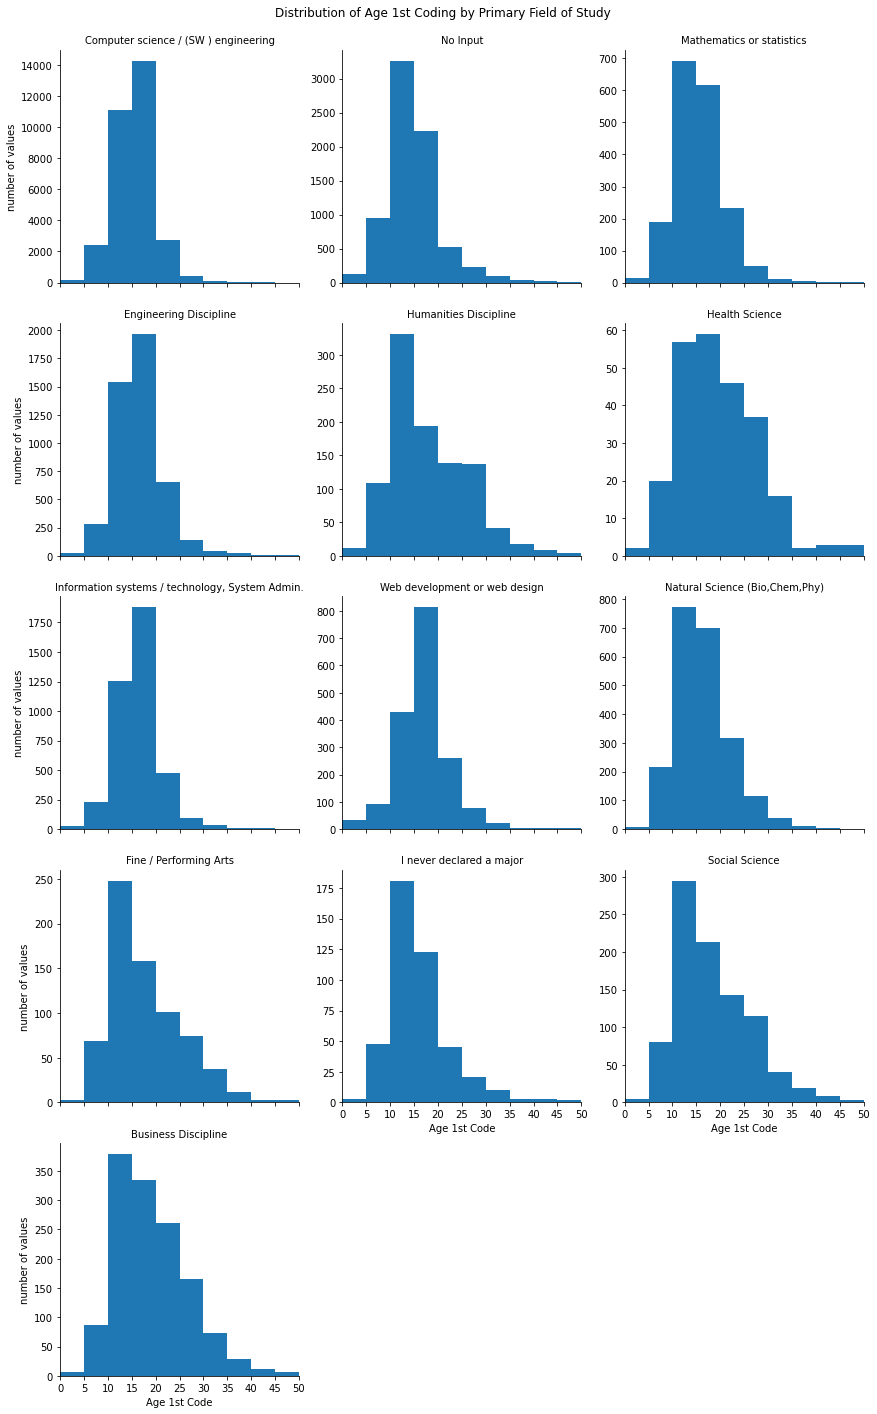

In [35]:
#create a Facet grid for the distribution of Age 1st Code with regard to the primary field of study 
y = plot_facetgrid(df_1age, 'UndergradMajor', 'Age1stCode')

#plot description, title, x-/Y-labels etc. 
y.set_axis_labels("Age 1st Code", "number of values")
y.fig.suptitle('Distribution of Age 1st Coding by Primary Field of Study') 
plt.show(); 

### EVALUATION
---

**Observations / Results:**<br>
Education Level - People without degree, no formal education and doctoral degree start earlier with programming between 10 and 15 years. The remaining education levels are similar distributed as the general distribution of age at first code programming. This is interesting as it would have been anticipated that people with higher degrees might have started programming earlier than people without any formal education. 

Primary Field of Study - With regard to the primary field the distribution of age at first coding practice in some areas different than in the general distribution. Basically we can see that in the most of study fields they also start coding between 10 and 20 years. But there are some differences: 
- **Health Science:** <br>Although there are not many people with Health Science as primary study field the age the most of them started coding last from 10 to 30 years. 10 years longer than the general distribution. 
- **Social Science and Business Discipline:**<br> In both study fields the most of the people also started coding with 10 years and then the distribution continously falls down - similar to a logarithmic function. 
- **IT-related study fields:**<br> With regard to the primary field it is interesting that with regard to the studies concerning the digital business / information technology field they start later than people with studies not associated with IT / Programming.


### DEPLOY 

For further insights and observations please see my blog post on the respective GitHub-Repository: https://github.com/AlexHub2020/Udacity_StackOverFlow_Project/commit/02f20aef4acd4485d1a388bcaaf80eeefbef6813